<a href="https://colab.research.google.com/github/yeonghun00/Twitter-Sentiment-Analysis/blob/main/Market%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai: filename=openai-0.26.5-py3-none-any.whl size=67620 sha256=e2e14338aff05ad45b4da6126615e3d3980ef2a69b04371f7245a9f3187ea7d0
  Stored in directory: /root/.cache/pip/wheels/a7/47/99/8273a59fbd59c303e8ff175416d5c1c9c03a2e83ebf7525a99
Successfully built openai


In [7]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 3.3 MB/s eta 0:00:00


In [28]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import os
import re
import pandas as pd
import numpy as np

import snscrape.modules.twitter as sntwitter

import matplotlib.pyplot as plt

from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [15]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

today = datetime.today()

search = 'tesla stock'
min_faves = 100
lang = 'en'
until = today.strftime('%Y-%m-%d')
since = (today - relativedelta(months=3)).strftime('%Y-%m-%d')

query = '{} min_faves:{} lang:{} until:{} since:{}'.format(search, min_faves, lang, until, since)

In [18]:
tweets = []
limit = 3000

for tweet in sntwitter.TwitterSearchScraper(query).get_items(): 
  if len(tweets) == limit:
      break
  else:
      tweets.append([tweet.date, tweet.username, tweet.content])
      
tweet_df = pd.DataFrame(tweets, columns=['date', 'user', 'tweet'])

<ipython-input-18-73e9517c1e84>:8: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])
<ipython-input-18-73e9517c1e84>:8: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content])


In [20]:
def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
  text = re.sub(r'https?:\/\/\S+', '', text) # remove hyperlinks
  text = re.sub(r'#', '', text) # remove #s
  return text

In [21]:
tweet_df.loc[:,'tweet'] = [clean_text(x) for x in tweet_df.loc[:,'tweet']]

' Norfolk Southern made 12 billion last year, and instead of buying safer trains, they authorized a 10 billion dollar stock buyback.\n\nThat’s the story.'

In [31]:
analyzer = SentimentIntensityAnalyzer()

vs = analyzer.polarity_scores(tweet_df['tweet'][0])
print("{:-<65} {}".format(tweet_df['tweet'][0], str(vs)))

 Norfolk Southern made 12 billion last year, and instead of buying safer trains, they authorized a 10 billion dollar stock buyback.

That’s the story. {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.4215}


In [25]:
tweet_df.sort_values(by=['polarity'])


,date,user,tweet,subjectivity,polarity
868,2022-12-13 20:12:10+00:00,FrankMikeDavis1,"...Would You get terribly upset if Tesla's ""st...",1.0,-1.0
351,2022-12-27 21:09:49+00:00,RpsAgainstTrump,"Tesla's stock is headed for its worst month, q...",1.0,-1.0
349,2022-12-27 21:14:12+00:00,Investingcom,"*TESLA STOCK IS ON PACE FOR ITS WORST MONTH, Q...",1.0,-1.0
325,2022-12-28 03:03:20+00:00,axios,Tesla's stock is poised to end 2022 on a grim ...,1.0,-1.0
472,2022-12-22 23:20:39+00:00,ParacelsusII,when he started ‘explaining’ the pronoun thing...,1.0,-1.0
...,...,...,...,...,...
364,2022-12-27 19:39:15+00:00,kevinwitvliet00,BREAKING: Tesla stock burning faster than a Te...,1.0,1.0
91,2023-02-03 16:40:46+00:00,DrEliDavid,Priceless: receiving money management advice ...,1.0,1.0
944,2022-12-09 20:04:31+00:00,Teslaconomics,2022 was the best year fundamentally for Tesla...,0.3,1.0
216,2023-01-04 02:44:07+00:00,KirtanShahCFP,"- With Apple falling 4% yesterday, there is no...",0.3,1.0


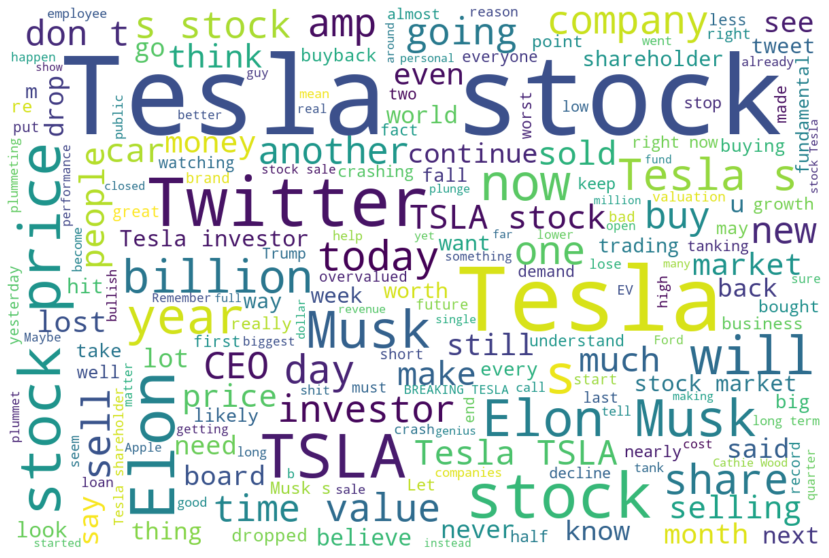

In [26]:
all_words = ' '.join([x for x in tweet_df['tweet']])
word_cloud = WordCloud(width=1200, height=800, background_color='white').generate(all_words)

plt.figure(figsize=(18,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import json
#Store you OpenAPI key in a json file
OPENAI_API_KEY = ''
with open('/content/OpenAI.json', 'r') as file_to_read:
    json_data = json.load(file_to_read)
    OPENAI_API_KEY = json_data["OPENAI_API_KEY"]

In [ ]:
import os
import openai

openai.api_key =  OPENAI_API_KEY

In [ ]:
i =1
tweet_str=''
for tweet in tweet_list:
   tweet_str = tweet_str + str(i) +'.'+'"'+tweet+'"'+'\n'
   i=i+1
   if i == 30:
     break

In [ ]:
prompt="Classify the sentiment in these tweets with probability:\n" + tweet_str + "\n Tweet sentiment ratings:"

In [ ]:
print(prompt)

In [ ]:
response = openai.Completion.create(
  model="text-davinci-003",
  prompt= prompt,
  temperature=0,
  max_tokens=120,
  top_p=1.0,
  frequency_penalty=0.0,
  presence_penalty=0.0
)

In [ ]:
(response["choices"][0]["text"]).split('\n')[1:]